# LANGAGE DES SIGNES

In [1]:
#IMPORTS
import os #path handling
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #Data set splitting functions
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata
from skimage.transform import resize

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier #kNN classifier

import skimage
from skimage import filters
from skimage import morphology

#import warnings
#warnings.filterwarnings('ignore')

#mnist = fetch_mldata('MNIST original')

C:\Users\almal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#dataPath = '/Users/timon/Desktop/Data_analysis/BE/signLanguage/' #
#dataFile = os.path.join(dataPath,'X.npy') # data file to use
dataFile = 'X.npy'
image = np.load(dataFile)
#targetFile = os.path.join(dataPath,'Y.npy') # data file to use
targetFile = 'Y.npy'
target = np.load(targetFile)

# 1 - Traitement d'image

In [3]:
#label = os.path.join(dataPath,'classesLabels.txt') 
#correspondance = pd.read_csv(label)
#k=np.size(target)
#goal=np.zeros(2062)

def labelToSignNumber(label):
  """
  Convert a one-hot encoded label to the
  corresponding sign language value.
  Mapping is given in the ClassLabels.txt
  file.
  
  Args:
    label: (numpy.array) One-hot encoded label

  Returns: (float) Sign language value
  """
  labelValue = np.argmax(label)
  mapping = {0:9,
             1:0,
             2:7,
             3:6,
             4:1,
             5:8,
             6:4,
             7:3,
             8:2,
             9:5}
  return mapping[labelValue]

target = [labelToSignNumber(item) for item in target]

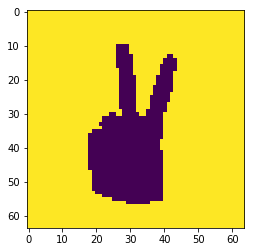

In [5]:
def contrast(image):
    #val = filters.threshold_otsu(im)
    #mask = im < val
    simple_threshold = image > filters.threshold_otsu(image)
    #adaptive_threshold = filters.threshold_adaptive(im, 101)
    filter_res = skimage.morphology.remove_small_objects(simple_threshold)

    lx, ly = image.shape
    X, Y = np.ogrid[0:lx, 0:ly]
    mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/7
    # Using masks
    filter_res[mask] = 1
    return filter_res

image_cont = contrast(image[1789])
plt.imshow(image_cont);

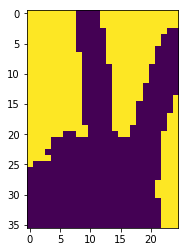

In [6]:
def crop(ima):
    n,m = ima.shape
    maxx=minx=maxy=miny = 0
    j = i = 0
    while miny==0 and j<m:
        if (ima[i][j]!=1):
            miny=j              
        i+=1
        if (i==n-1):
            i=0
            j+=1
    i=0
    while minx==0 and i<n:
        if (ima[i][j]!=1):
            minx=i               
        j+=1
        if (j==m-1):
            j=miny
            i+=1
    j=m-1
    while maxy==0 and j>miny:
        if (ima[i][j]!=1):
            maxy=j               
        i+=1
        if (i==n-1):
            i=minx
            j-=1
    i=n-1
    while maxx==0 and i>minx:
        if (ima[i][j]!=1):
            maxx=i               
        j-=1
        if (j==miny):
            j=maxy
            i-=1
    new_image= ima[minx:maxx-10,miny:maxy]
    return (new_image)

image_cut = crop(image_cont)
plt.imshow(image_cut);

C:\Users\almal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\almal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


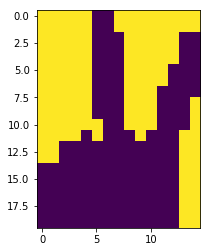

In [7]:
image_cadré = resize(image_cut,(20,15))
plt.imshow(image_cadré);

simple_threshold = image_cadré > filters.threshold_otsu(image_cadré)
plt.imshow(simple_threshold);

In [8]:
def transformation(image):
    image_cont = contrast(image)
    image_cut = crop(image_cont)
    image_cadré = resize(image_cut,(20,15))
    finale = image_cadré > filters.threshold_otsu(image_cadré)
    return finale

In [9]:
data = [transformation(item) for item in image]

C:\Users\almal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\almal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [10]:
data[1]

array([[ True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
        False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False, False,  True, False, False,
        False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False, False,  True, False, False,
        False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False, False,  True, False, False,
        False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False, False,  True, False, False,
        False,  True,  True,  True,  True,  True],
       [False, False,  True,  True, False, False,  True, False, False,
        False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True, False,  True, False, False,
        False,  True,  True,  True,  True,  True],
       [False, False,  T

In [11]:
newdata=[(np.array(item)).flatten() for item in data]
trainData,testData,trainY,testY = train_test_split(newdata,target,test_size=0.2)

0.8523002421307506
[[28  1  0  0  2  0  0  0  1  0]
 [ 0 45  2  0  0  0  0  1  2  0]
 [ 0  3 31  1  1  0  4  1  0  0]
 [ 0  0  2 36  0  2  0  0  0  0]
 [ 0  0  1  0 30  1  1  2  3  1]
 [ 0  0  0  1  1 39  0  0  0  1]
 [ 0  0  1  1  2  0 41  0  0  0]
 [ 1  1  0  0  3  0  0 31  1  1]
 [ 0  1  0  0  0  0  0  4 37  4]
 [ 0  1  0  1  0  1  0  1  2 34]]


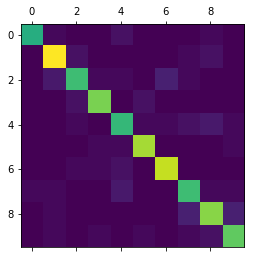

In [12]:
clf = MLPClassifier(solver='lbfgs',random_state=0)

clf.fit(trainData,trainY)
print(clf.score(testData,testY))

# Check the classifier's performance on the test data
predictions = clf.predict(testData)
testCM = confusion_matrix(y_pred=predictions,y_true=testY)
print(testCM)
plt.matshow(testCM);

0.9128329297820823
[[40  0  0  0  1  0  0  0  0  0]
 [ 0 48  1  0  0  0  0  0  0  0]
 [ 0  1 36  0  0  0  0  0  0  0]
 [ 0  1  1 45  0  1  0  1  0  0]
 [ 0  0  0  2 29  2  0  4  1  2]
 [ 0  0  0  0  0 44  0  0  1  0]
 [ 1  0  4  0  0  0 35  2  0  0]
 [ 0  3  0  0  0  0  0 29  0  0]
 [ 0  0  1  0  2  0  1  0 36  0]
 [ 0  1  0  0  0  0  0  1  1 35]]


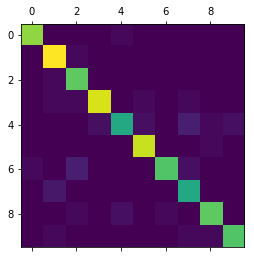

In [47]:
clf = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',metric='minkowski',p=2,n_jobs=-1)
#AdaBoostClassifier(n_estimators=50)

clf.fit(trainData,trainY)
print(clf.score(testData,testY))

# Check the classifier's performance on the test data
predictions = clf.predict(testData)
testCM = confusion_matrix(y_pred=predictions,y_true=testY)
print(testCM)
plt.matshow(testCM);